In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
import statsmodels.api as sm
#Para mostrar resultados en la notebook de jupyter
%matplotlib inline 


##Trabajo anterior

In [30]:
#En una celda concentramos todas las operaciones
#Sobre las transformaciones del dataframe original
# Preparando el dataframe df_meteo


url='https://raw.githubusercontent.com/Jen-Ocana/Fisica-Computacional-1/master/Actividad%203/8352.txt'
my_cols=['Fecha','Precip','Evap','Tmax','Tmin']
df_orig=pd.read_csv(url,names=my_cols,encoding='cp1251',sep='\s+',header=None,skiprows=19,skipfooter=1,engine='python')
#definimos un data frame con los nombres de las columnas, el archivo tiene codigos ACII extendido que es el español, asi que se lo indicamos con encoding
#Se brincara los primeros 19 reglones que no tienen info y le ultimo sin encabezado
df_work0=df_orig.copy()
#Cambiamos los espacios en blanco por 'nulo' 
str_Nulo='Nulo'
df_work1=df_work0.replace(to_replace=str_Nulo,value='',regex=True)
#Convertimos los valores de las variables ambientales a num. flotantes
cols_list=['Precip','Evap','Tmax','Tmin']
for cols in cols_list:
  df_work1[cols]=pd.to_numeric(df_work1[cols],errors='coerce')
#la copia por si es necesario
df_work2=df_work1.copy()
#El primer dato es el dia
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'],dayfirst=True).copy()
#Dos columnas adicionales, una de año y otra de mes
#Usamos la funcion .dt.year y .dt.month para extraerlos de la fecha
# Usaremos la función .dt.year y .dt.strftime(%b) para extraer el Año 
# y Mes (Abreviado) de la Fecha
df_work2['Año']=df_work2['Fecha'].dt.year
df_work2['Mes']=df_work2['Fecha'].dt.strftime('%b')
##Para esta actividad definimos un nuevo dataframe para el analisis
#Para nuevo punto de partida
df_meteo = df_work2.copy()

##ELIMINEMOS LA COLUMNA DE MES NUMERICO
df_meteo.drop('Mes',axis=1,inplace=True)
df_meteo['Mes']=df_meteo['Fecha'].dt.strftime('%b')
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   7907 non-null   datetime64[ns]
 1   Precip  7783 non-null   float64       
 2   Evap    0 non-null      float64       
 3   Tmax    7815 non-null   float64       
 4   Tmin    7819 non-null   float64       
 5   Año     7907 non-null   int64         
 6   Mes     7907 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 432.5+ KB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1983-07-01     0.0   NaN   NaN   NaN  1983  Jul
1 1983-07-02     0.0   NaN   NaN   NaN  1983  Jul
2 1983-07-03     0.0   NaN  27.0   NaN  1983  Jul
3 1983-07-04     0.0   NaN  29.0   9.0  1983  Jul
4 1983-07-05     0.0   NaN  31.0  12.0  1983  Jul
          Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
7902 2007-11-26     0.0   NaN  26.0   3.0  2007  Nov
7903 2007

In [31]:
#Creamos una copia para proceder
df_meteo_ts=df_meteo.copy()

#Queemos que el indice del dataframe sea la variable 'Fecha'
df_meteo_ts=df_meteo_ts.set_index('Fecha')
#Verificamos
df_meteo_ts.info()
print(df_meteo_ts.head())
print(df_meteo_ts.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7907 entries, 1983-07-01 to 2007-11-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  7783 non-null   float64
 1   Evap    0 non-null      float64
 2   Tmax    7815 non-null   float64
 3   Tmin    7819 non-null   float64
 4   Año     7907 non-null   int64  
 5   Mes     7907 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 432.4+ KB
            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
1983-07-01     0.0   NaN   NaN   NaN  1983  Jul
1983-07-02     0.0   NaN   NaN   NaN  1983  Jul
1983-07-03     0.0   NaN  27.0   NaN  1983  Jul
1983-07-04     0.0   NaN  29.0   9.0  1983  Jul
1983-07-05     0.0   NaN  31.0  12.0  1983  Jul
            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
2007-11-26     0.0   NaN  26.0   3.0  2007  Nov
2007-11-27     0.0   NaN  22.0   4.0

##Seleccionando datos

In [32]:
#Seleccionaremos un connjunto de años de 30 años
#Sin embargo mi estacion solo tiene datos de los ultimos 27 años 
df_01=df_meteo_ts[(df_meteo_ts['Año']>=1984)&(df_meteo_ts['Año']<2008)]
df_00=df_meteo_ts[(df_meteo_ts['Año']>=1990)&(df_meteo_ts['Año']<2008)]
#Nos aseguramos de que esten todos, y sive para entender el comando 
#anterior
df_00.head()
df_00.tail()
##Quedo bien

,Precip,Evap,Tmax,Tmin,Año,Mes
Fecha,,,,,,
2007-11-26,0.0,NaN,26.0,3.0,2007,Nov
2007-11-27,0.0,NaN,22.0,4.0,2007,Nov
2007-11-28,0.0,NaN,20.0,4.0,2007,Nov
2007-11-29,22.0,NaN,24.0,3.0,2007,Nov
2007-11-30,0.0,NaN,NaN,3.0,2007,Nov


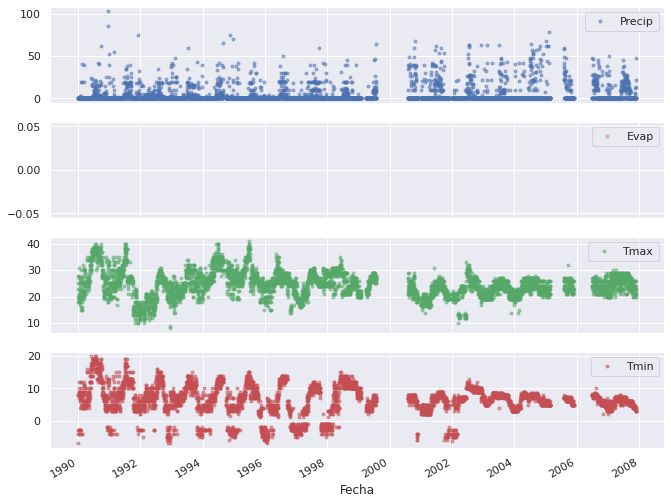

In [33]:
#Veamos si hay datos faltantes 
cols_plot=['Precip','Evap','Tmax','Tmin']
ax_ylabels=['Precip(mm)','Evap(mm)','Tmax °C','Tmin °C']
axes=df_00[cols_plot].plot(marker='.',alpha=0.5,linestyle='None',figsize=(11,9), subplots=True)
#Alpha es para la transparencia
##Podemos observar que hay tres saltos
##Por el 2000, 2005 y finles de 2006
#En la temperatura minima vemos una franja que parece que faltan datos
##alrededor del 0

##Actividad 1
 Explora tus datos de Precipitación los últimos años 1990- fin de datos.

###Grafica todo el rango de datos utilizando la función df.plot()

Precipitacion promedio de 1990 a 2007 :  3.7785550256138625


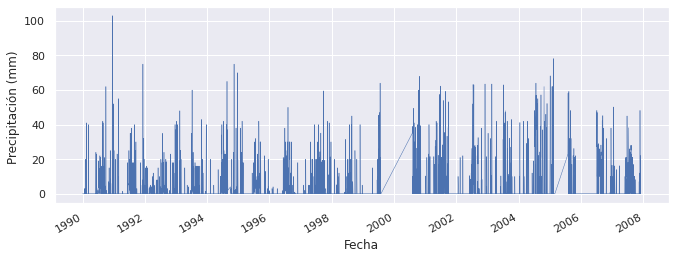

In [34]:
## Graficamos la precipitacion de los ultimos treinta años
##En nuestro caso nos quedariamos con 17 años y tenemos apenas 27 datos 
#desde 1983 que es tan solo 7 años antes de nuestro limite inferior
##Graficamos de 1990 a 2007
sns.set(rc={'figure.figsize':(11,4)})
Precip_ave_00 = df_00.Precip.mean()
df_00['Precip'].plot(linewidth=0.5);
plt.ylabel('Precipitación (mm) ');
print('Precipitacion promedio de 1990 a 2007 : ',Precip_ave_00)

###Analiza un año específico completo, utiliza la función df.loc() para seleccionar el rango de datos. 

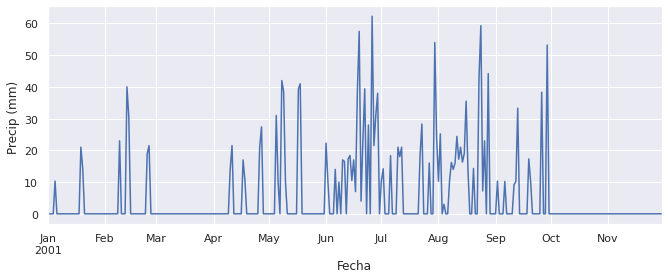

In [35]:
#Invewstifando un año de datos usando la funcion df-loc()
#para filtrar u periodo
ax=df_00.loc['2001','Precip'].plot()
ax.set_ylabel('Precip (mm) ');

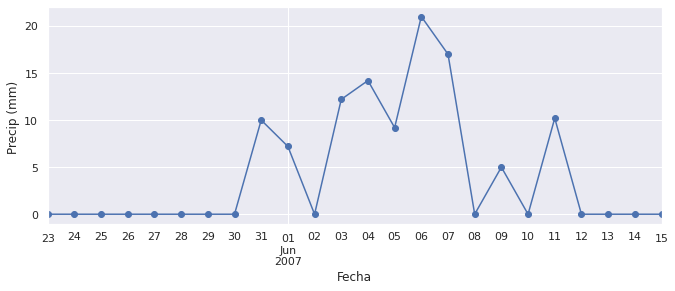

In [36]:
##Investigando un perido de datos mas especifico
#un intervalo

ax = df_00.loc['2007-05-23':'2007-06-15','Precip'].plot(marker='o',linestyle='-')
ax.set_ylabel('Precip (mm) ');

###Grafica la estacionalidad de tus datos por mes utilizando la función sns.barplot() 

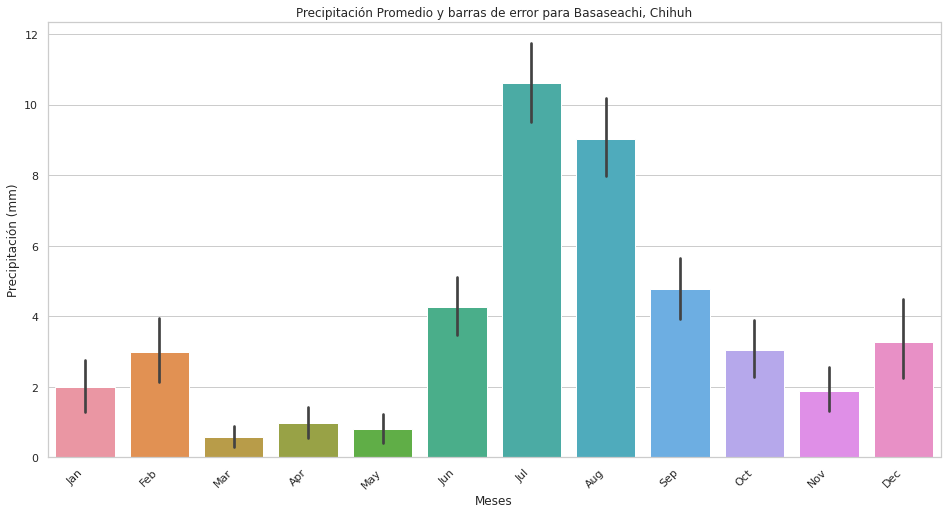

In [37]:
# Gráfica de Precipitación últimos 17 años
# Agrupada por mes
sns.set_style('whitegrid')

# Tamaño de la gráfica
plt.figure(figsize=(16,8))

# Graficamos 17 años de datos usando la columna 'Mes' en el eje x
g =sns.barplot(x='Mes', y='Precip', data=df_00);

# Rotamos 45º los Años en el eje x para mejor lectura
g.set_xticklabels(g.get_xticklabels(), rotation=45,
                  horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Basaseachi, Chihuh')

plt.show()

##Actividad 2
Explora tus datos de Temperaturas Máxima y Mínima de los últimos 30 años datos a partir de 1990.  Trata de construir dos subgráficas contiguas. 

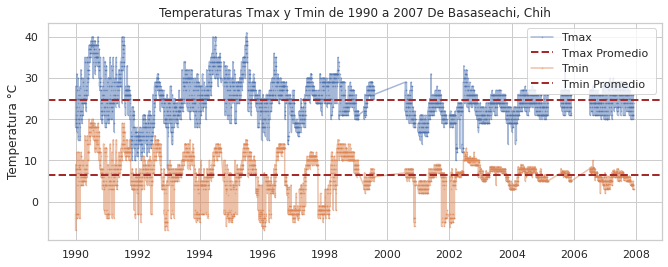

In [38]:
##Graficas de temperaturas Tmax, Tmin y los promedios
star,end='1990-01','2007-12'

fig,ax= plt.subplots()
for nm in ['Tmax','Tmin']:
  ax.plot(df_00[nm],marker='.',markersize=1,linestyle='-'
  ,alpha=0.5,label=nm)
  plt.axhline(df_00.loc[star:end,nm].mean(),color='brown',linestyle='--',
              linewidth=2,label=nm +' Promedio ');
  ax.legend()
  ax.set_ylabel('Temperatura °C')
  ax.set_title('Temperaturas Tmax y Tmin de 1990 a 2007 De Basaseachi, Chih');
  


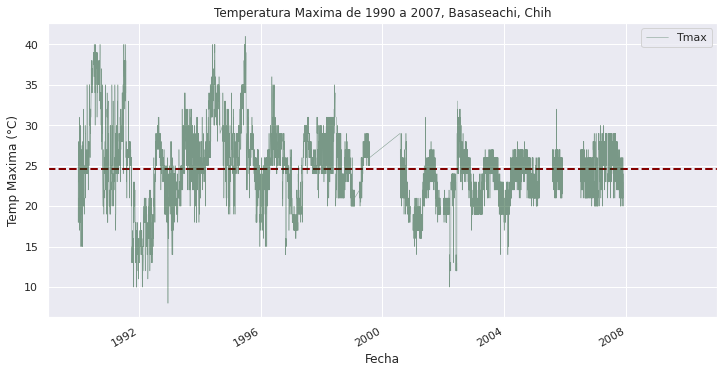

In [39]:
#Graficamos la Tmax de los ultimos 30 años
#En nuestro caso los 17 años de datos que tenemos 
#Tamaño de la figura
sns.set(rc={'figure.figsize':(12,6)})

#Calculo de promedio :)
Tmax_ave_00= df_00.Tmax.mean()

#Graficar la linea del promedio morado
plt.axhline(Tmax_ave_00, color='xkcd:dark red',linestyle='--',linewidth=2);

#Graficando la temperatura
df_00['Tmax'].plot(linewidth=0.5,alpha=0.5,color='xkcd:pine green');
plt.ylabel('Temp Maxima (°C)');
plt.title('Temperatura Maxima de 1990 a 2007, Basaseachi, Chih')

plt.legend();
##No hay necesidad de diferencias de promedios


###Analiza un año específico completo para las dos Temperaturas, con apoyo de la función df.loc() 

Text(0.5, 1.0, 'Temperaturas Max y Min de 1990')

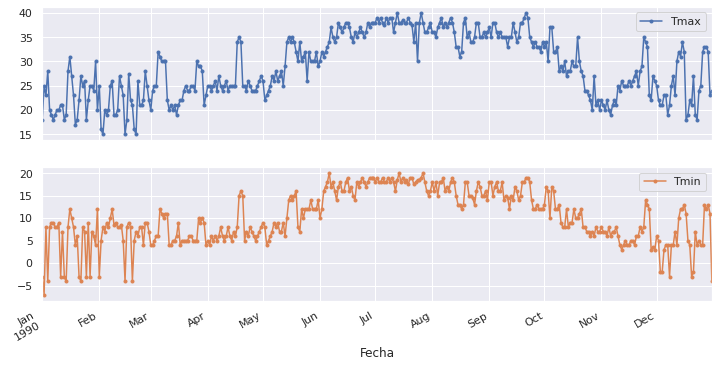

In [40]:
cols_plot =['Tmax','Tmin']
ax_ylabels =['Tmax °C','Tmin °C']
axes =df_00.loc['1990',cols_plot].plot(marker='.',linestyle='-',subplots=True)
ax.legend()
ax.set_ylabel('Temperatura °C')
ax.set_title('Temperaturas Max y Min de 1990')

###Grafica la estacionalidad filtrando tus datos por mes y utilizando la función sns.boxplot(), incluye una línea punteada mostrando el promedio.  

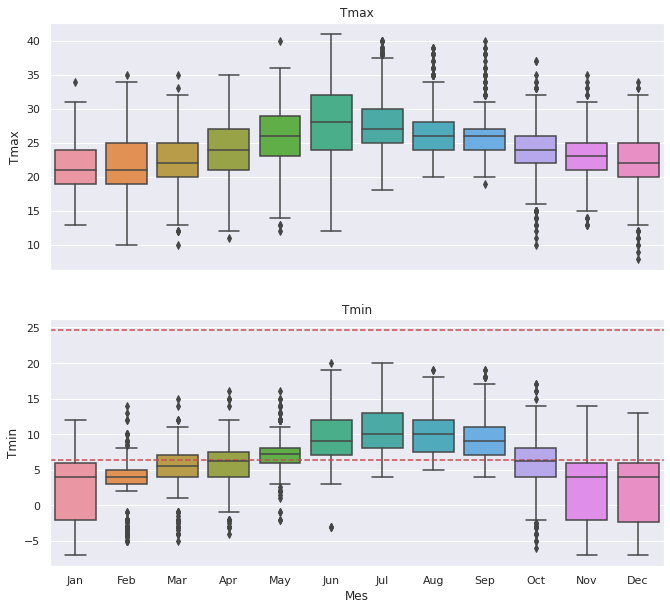

In [41]:
# Analizando Estacionalidad de los datos, similar a lo que ya hicimos anteriormente.
# Dos gráficas en una
fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['Tmax', 'Tmin'], axes):
  sns.boxplot(data=df_00, x='Mes', y=name, ax=ax)
  
  plt.axhline(df_00[name].mean(),linestyle='--',color='r')
  
  ax.set_title(name)
# Elimina la etiqueta del eje x excepto la de la subgráfica de abajo 
  if ax != axes[-1]:
    ax.set_xlabel('')

##Actividad 3
Realiza el mismo análisis que en la Actividad 2, pero para la variable de Evaporación.

 
 Nulo

##Actividad 4
Crea nuevos DataFrames de las Temperaturas y la Evaporación con promedios móviles de 7, 30 y 365 días, utilizando la función df.rolling(). Explora tus datos:
 

###Para un año de datos, contrastando los datos diarios con el promedio móvil de 7 y 30 días. 

In [42]:
##Suavizaremos la curva de temperatura maxima utilizando
#promedios moviles de 7,30 y 365 dias

data_cols = ['Evap','Tmax','Tmin']
df_00_7d=df_00[data_cols].rolling(7,center=True,min_periods=1).mean()
df_00_30d =df_00[data_cols].rolling(30, center=True,min_periods=1).mean()
df_00_365d = df_00[data_cols].rolling(365,center=True,min_periods=1).mean()


df_01_7d=df_01[data_cols].rolling(7,center=True,min_periods=1).mean()
df_01_30d =df_01[data_cols].rolling(30, center=True,min_periods=1).mean()
df_01_365d = df_01[data_cols].rolling(365,center=True,min_periods=1).mean()
##hay graficas abajo que estan hechas con los 27 años para ver una tendencia
#Trabajando en la graficacion me di cuenta de una inconsistencia en cuanto 
#A los periodos graficanles
#En discusion con el grupo de clase un compañero compartio informacion

#Problema con el rolling
#Numero minimo de observaciones en la ventana necesarias para tener un valor
#(De otra modo sera NA)
#Para una ventana que esta especificada por un desplazamiento,min_periods se 
#estbablece por defecto en 1, de lo contrario,min_periods se ajustara
#por defecto al tamaño de la ventana



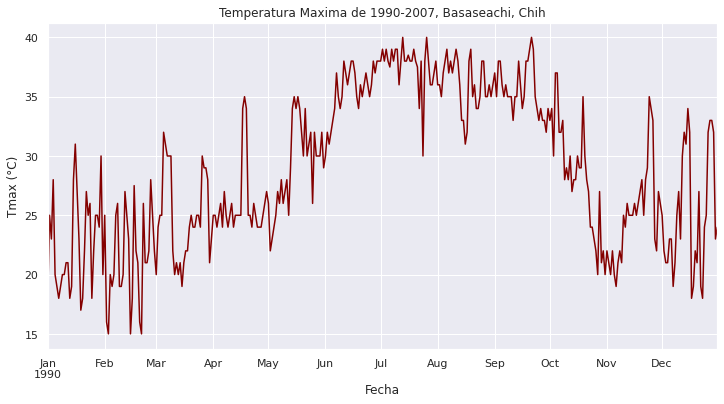

In [43]:
#investigando un rango de datos

sns.set(rc={'figure.figsize':(12,6)})
ax = df_00.loc['1990','Tmax'].plot(color='xkcd:dark red')
ax.set_ylabel('Tmax (°C)');
ax.set_title('Temperatura Maxima de 1990-2007, Basaseachi, Chih');

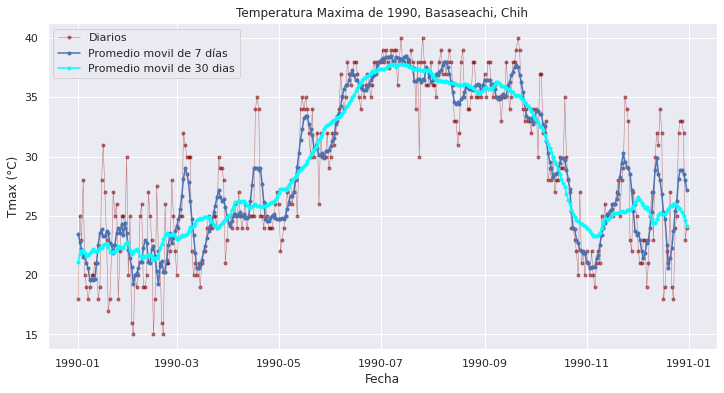

In [44]:

 #Contraste de la grafica de datos diarios y la de promedio movil
 # de 7 dias y 30 dias
 ##   PARA UN AÑO DE DATOS ##

sns.set(rc={'figure.figsize':(12,6)})

fig, ax =plt.subplots()

ax.plot(df_00.loc['1990','Tmax'],
        marker='.',linestyle='-',linewidth=0.5,
        label='Diarios',color='xkcd:dark red',
        alpha=0.5)
 
ax.plot(df_00_7d.loc['1990','Tmax'],marker='.',linestyle='-', color='b',
         label='Promedio movil de 7 días')

ax.plot(df_00_30d.loc['1990','Tmax'],marker='.',linestyle='-',
        color='xkcd:cyan',label='Promedio movil de 30 dias')
 
ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (°C)')
ax.set_title('Temperatura Maxima de 1990, Basaseachi, Chih')
ax.legend()

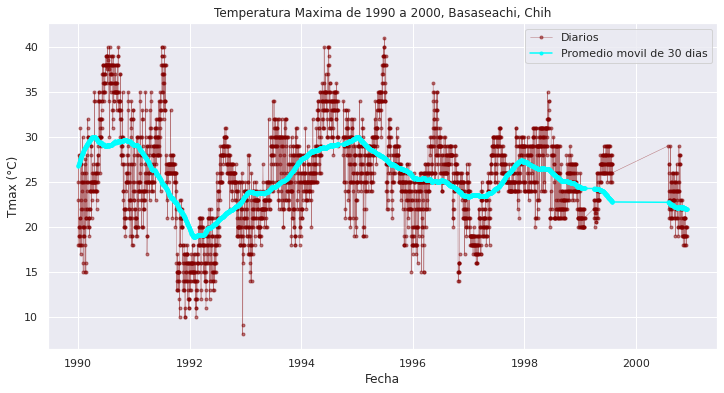

In [45]:
#Contraste de la grafica de datos diarios y la de promedio movil
 # 30 dias
 ##   PARA 10 AÑOS DE DATOS ##
## Tengo 17 años con un hueco en el 2000

##Ponemos el intervalo
star,end='1990','2000'
sns.set(rc={'figure.figsize':(12,6)})

fig, ax =plt.subplots()

ax.plot(df_00.loc[star:end,'Tmax'],
        marker='.',linestyle='-',linewidth=0.5,
        label='Diarios',color='xkcd:dark red',
        alpha=0.5)


ax.plot(df_00_365d.loc[star:end,'Tmax'],marker='.',linestyle='-',
        color='xkcd:cyan',label='Promedio movil de 30 dias')
 
ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (°C)')
ax.set_title('Temperatura Maxima de 1990 a 2000, Basaseachi, Chih')
ax.legend()

####Temperaturas minimas


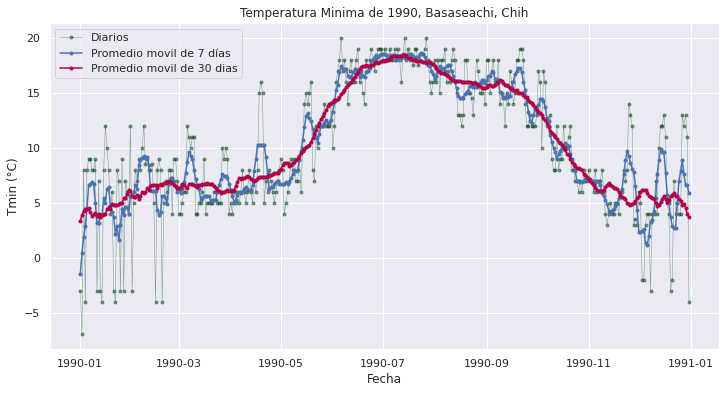

In [46]:
 #Contraste de la grafica de datos diarios y la de promedio movil
 # de 7 dias y 30 dias
 ##   PARA UN AÑO DE DATOS ##

sns.set(rc={'figure.figsize':(12,6)})

fig, ax =plt.subplots()

ax.plot(df_00.loc['1990','Tmin'],
        marker='.',linestyle='-',linewidth=0.5,
        label='Diarios',color='xkcd:pine green',
        alpha=0.5)
 
ax.plot(df_00_7d.loc['1990','Tmin'],marker='.',linestyle='-', color='b',
         label='Promedio movil de 7 días')

ax.plot(df_00_30d.loc['1990','Tmin'],marker='.',linestyle='-',
        color='xkcd:raspberry',label='Promedio movil de 30 dias')
 
ax.set_xlabel('Fecha')
ax.set_ylabel('Tmin (°C)')
ax.set_title('Temperatura Minima de 1990, Basaseachi, Chih')
ax.legend()

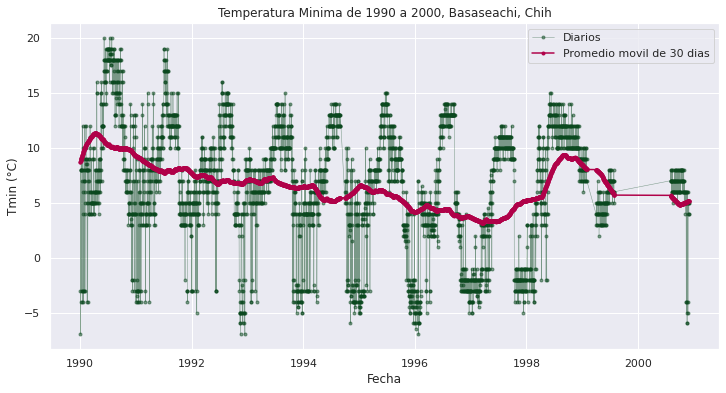

In [47]:
#Contraste de la grafica de datos diarios y la de promedio movil
 # 365 dias
 ##   PARA 10 AÑOS DE DATOS ##
## Tengo 17 años con un hueco en el 2000

##Ponemos el intervalo
star,end='1990','2000'
sns.set(rc={'figure.figsize':(12,6)})

fig, ax =plt.subplots()

ax.plot(df_00.loc[star:end,'Tmin'],
        marker='.',linestyle='-',linewidth=0.5,
        label='Diarios',color='xkcd:pine green',
        alpha=0.5)


ax.plot(df_00_365d.loc[star:end,'Tmin'],marker='.',linestyle='-',
        color='xkcd:raspberry',label='Promedio movil de 30 dias')
 
ax.set_xlabel('Fecha')
ax.set_ylabel('Tmin (°C)')
ax.set_title('Temperatura Minima de 1990 a 2000, Basaseachi, Chih')
ax.legend()

####Ambas

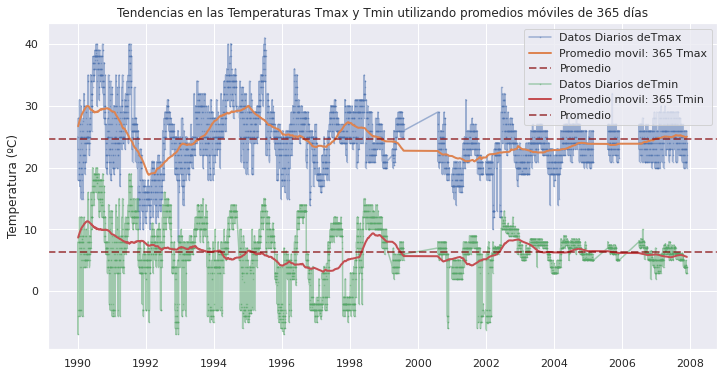

In [48]:
# Graficas de promedios móviles de 365 días 
#para las variables de las Temperaturas  
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '1990-01', '2007-12'

fig, ax = plt.subplots()
for nm in ['Tmax', 'Tmin']:
    ax.plot(df_00.loc[start:end, nm], marker='.',
            markersize=1, linestyle='-', alpha=0.5,
            label='Datos Diarios de'+nm)
    
    ax.plot(df_00_365d.loc[start:end, nm], linewidth=2, label='Promedio movil: 365 '+nm)
    #ax.plot(df_00_7d.loc[star:end,nm],linewidth=2, label=nm)
    plt.axhline(df_00.loc[start:end, nm].mean(), color ='xkcd:dark red',
                linestyle='--', linewidth=2,label='Promedio',alpha=0.6);
    
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Tendencias en las Temperaturas Tmax y Tmin utilizando promedios móviles de 365 días');

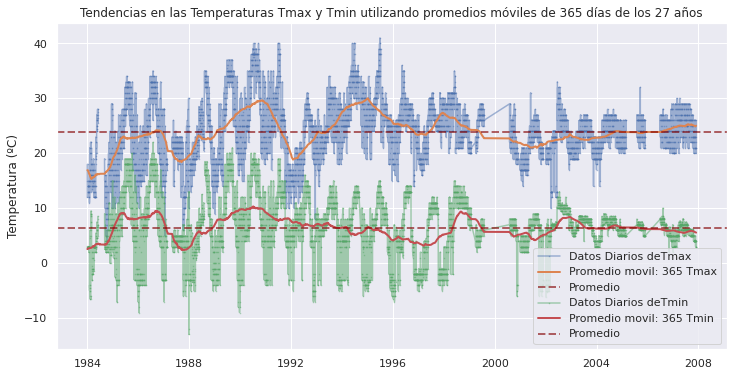

In [49]:
# Graficas de promedios móviles de 365 días 
#para las variables de las Temperaturas  

###OBSERVANDO PARA GRAFICAR LA SIG ACTIVIDAD###########3
########DATA FRAME COMPLETO, ES DECIR DE 1983 A 2007
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '1983-01', '2007-12'

fig, ax = plt.subplots()
for nm in ['Tmax', 'Tmin']:
    ax.plot(df_01.loc[start:end, nm], marker='.',
            markersize=1, linestyle='-', alpha=0.5,
            label='Datos Diarios de'+nm)
    
    ax.plot(df_01_365d.loc[start:end, nm], linewidth=2, label='Promedio movil: 365 '+nm)
    #ax.plot(df_00_7d.loc[star:end,nm],linewidth=2, label=nm)
    plt.axhline(df_01.loc[start:end, nm].mean(), color ='xkcd:dark red',
                linestyle='--', linewidth=2,label='Promedio',alpha=0.6);
    
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Tendencias en las Temperaturas Tmax y Tmin utilizando promedios móviles de 365 días de los 27 años');

##Actividad 5
Utiliza la biblioteca statsmodels.tsa de Python, para realizar una descomposición de una serie de tiempo: Serie Observada = Tendencia + Estacionalidad + Residuo.

Aplica la función seasonal_decompose para lograr esto, a los datos de Temperaturas Tmax y Tmin, y si tienes datos de Evaporación, selecciona un periodo que haya datos. La función de seasonal_decompose aplica su propio promedio móvil a las series de datos para su análisis.  

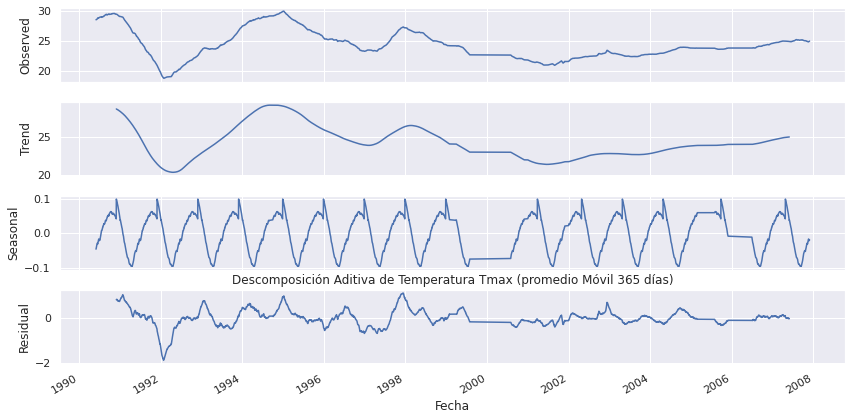

In [50]:
# Modelo Aditivo: Observado 
#= Tendencia + Estacionalidad + Residuo

#Usando datos de promedio movil de 365 dias



# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos 
#(No funciona cuando hace falta un rango de datos) 

##1990-1999
start, end = '1990-06', '2007-12'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

##USO EL DF_01 QUE TIENE TODOS LOS 27 DATOS#######################333
resTmax = sm.tsa.seasonal_decompose(df_01_365d.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 365 días)');
##Reclamaba que tenia datos inecesarios pero el dia 11 de Feb lo corri 
#Mostro el intervalo dado aunque no tuviera datos en ciertas partes
##El intervalo inicial seguro era de 1992-06 a 1996-12 observado
##De la grafica anterior
##Igual del 2000 en adelante tenemos dos huecos, (1) 2000 (2)2005 (3)2006
##Asi que las lineas se aplanan, excepto la seasonal

###Solo protesta con el 00 y no con el 01

Text(0.5, 1.0, 'Descomposicion aditiva de temperatura Tmax(promedio movil ')

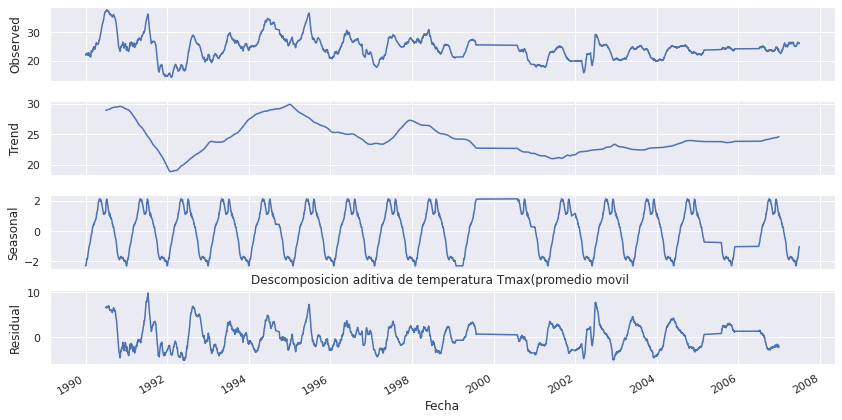

In [51]:
##En el caso de usar el data frame de 30 dias 


#En la copia de 1990 a 2007 no me deja
##En la de datos completos si me deja

sns.set(rc={'figure.figsize':(12,6)})

star,end='1990-01','2007-06'
decompfreq=365
##Uso de statsmodel para el analisis de series de tiempo (sm.tsa)
resTmax=sm.tsa.seasonal_decompose(df_01_30d.loc[star:end,'Tmax'].interpolate(),
                                  freq=decompfreq,model='additive')
resTmax.plot()
plt.title('Descomposicion aditiva de temperatura Tmax(promedio movil ')

Text(0.5, 1.0, 'Descomposicion Aditiva de Temperatura Tmax (datos diarios)')

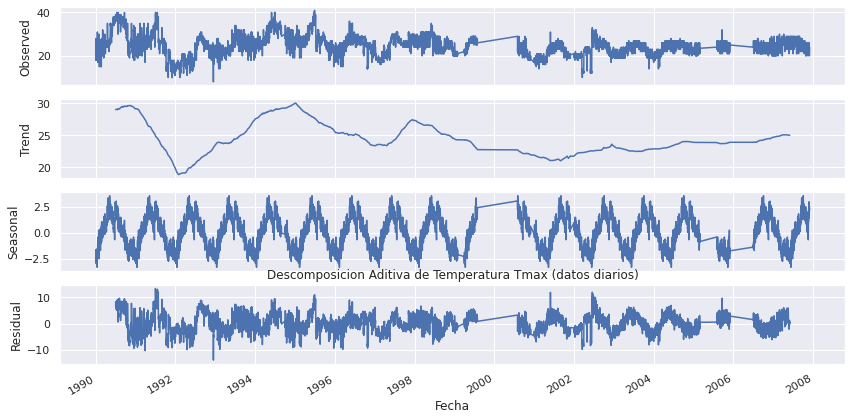

In [52]:
##Caso de datos diarios
#Descomposicion de Series de Tiempo
#Uso de la biblioteca 'Statmodel

#Modelo aditivo: observado=tendencia+estacionalidad+Residuo

#Tamaño de la figura
sns.set(rc={'figure.figsize':(12,6)})

star,end = '1900-01','2007-12'

decompfreq=365
resTmax=sm.tsa.seasonal_decompose(df_00.loc[star:end,'Tmax'].interpolate(),
                                  freq=decompfreq,model='additive')
resTmax.plot()
plt.title('Descomposicion Aditiva de Temperatura Tmax (datos diarios)')

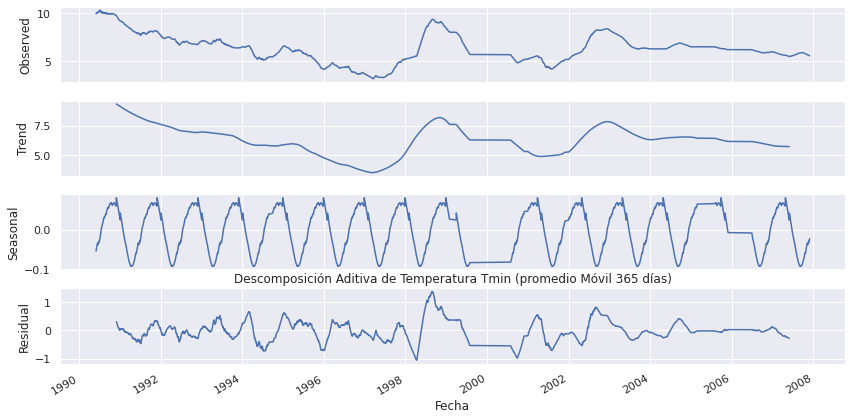

In [53]:
##Lo mismo para la temperatura minima
##Uso de datos de promedio movil de 365 dias
# Modelo Aditivo: Observado 
#= Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos 
#(No funciona cuando hace falta un rango de datos) 

##1990-1999
start, end = '1990-06', '2007-12'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

##USO EL DF_01 QUE TIENE TODOS LOS 27 DATOS#######################333
resTmax = sm.tsa.seasonal_decompose(df_01_365d.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (promedio Móvil 365 días)');
 
##Igual del 2000 en adelante tenemos dos huecos, (1) 2000 (2)2005 (3)2006
##Asi que las lineas se aplanan, excepto la seasonal
##No protesto una sola vez, 02/11/2021

Text(0.5, 1.0, 'Descomposicion aditiva de temperatura Tmin (promedio movil ')

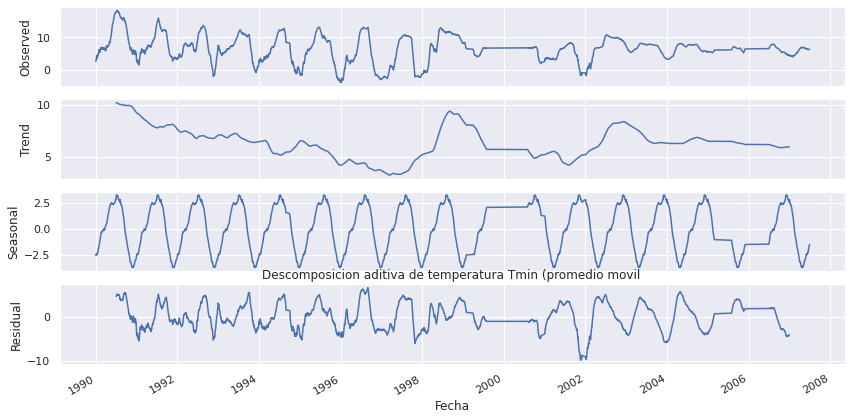

In [54]:
##En el caso de usar el data frame de 30 dias 
#En la copia de 1990 a 2007 no me deja
##En la de datos completos si me deja

sns.set(rc={'figure.figsize':(12,6)})

star,end='1990-01','2007-06'
decompfreq=365
##Uso de statsmodel para el analisis de series de tiempo (sm.tsa)
resTmax=sm.tsa.seasonal_decompose(df_01_30d.loc[star:end,'Tmin'].interpolate(),
                                  freq=decompfreq,model='additive')
resTmax.plot()
plt.title('Descomposicion aditiva de temperatura Tmin (promedio movil ')

Text(0.5, 1.0, 'Descomposicion Aditiva de Temperatura Tmin (datos diarios)')

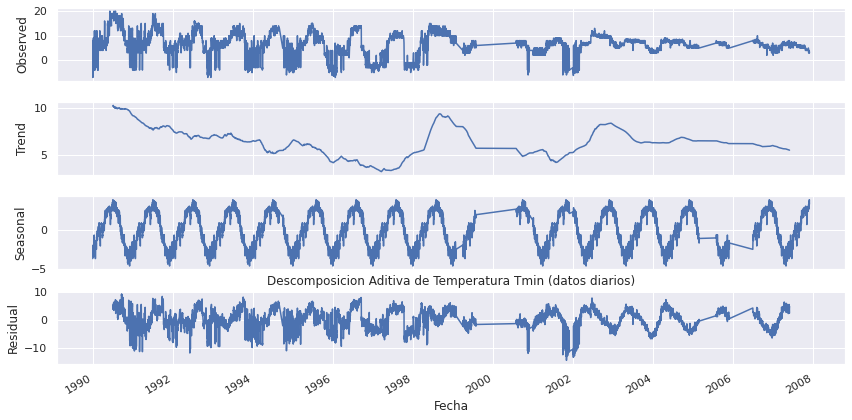

In [55]:
##Caso de datos diarios
#Descomposicion de Series de Tiempo
#Uso de la biblioteca 'Statmodel

#Modelo aditivo: observado=tendencia+estacionalidad+Residuo

#Tamaño de la figura
sns.set(rc={'figure.figsize':(12,6)})

star,end = '1900-01','2007-12'

decompfreq=365
resTmax=sm.tsa.seasonal_decompose(df_00.loc[star:end,'Tmin'].interpolate(),
                                  freq=decompfreq,model='additive')
resTmax.plot()
plt.title('Descomposicion Aditiva de Temperatura Tmin (datos diarios)')

##Actividad 6
Por favor explora visualmente si se observa un cambio en la distribución de Temperaturas (histogramas y kde), sobreponiendo dos histogramas de dos periodos de 30 años contiguos. Utiliza la función de Seaborn: sns.distplot. Agrega una línea vertical punteada indicando el valor del promedio de cada grupo de datos.  

 

In [56]:
#Grafica de distribuciones de Temperaturas Max y Minimas
#Creare dos particiones 
#2007-1983
#24/2=12
#1983+12=1995
df_p1=df_meteo_ts[(df_meteo_ts['Año']>=1983)&(df_meteo_ts['Año']>1995)]
df_p2 = df_meteo_ts[(df_meteo_ts['Año']>=1995)&(df_meteo_ts['Año']<2007)]


In [57]:
print(df_p1.Tmax.min())
print(df_p2.Tmax.min())
print(df_p1.Tmax.max())
print(df_p2.Tmax.max())

print(df_p1.Tmin.min())
print(df_p2.Tmin.min())
print(df_p1.Tmin.max())
print(df_p2.Tmin.max())

##Temperaturas maximas de 5 a 50 (10,41)
##Temperaturas minimas de -10 a 20 (-7,15)

10.0
10.0
36.0
41.0
-7.0
-7.0
15.0
15.0


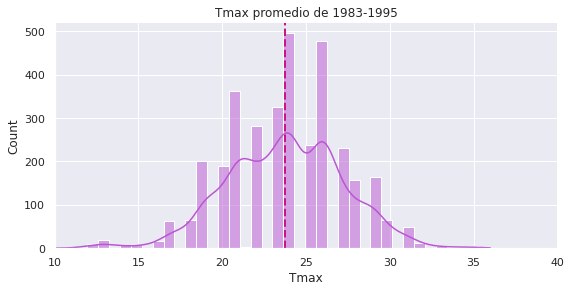

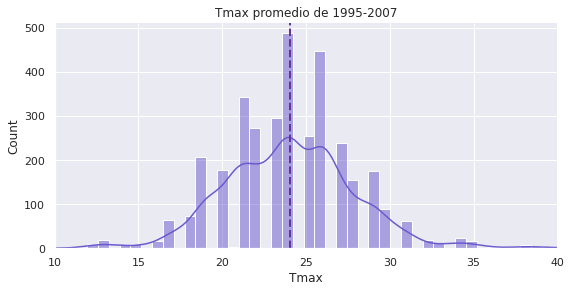

Tmax_promedio 1983-1995 =  23.756573244726958  °C
Tmax_promedio 1995-2007 =  24.041356611333715  °C
Tmax_sdev  1983-1995 =  3.498251543398621 ºC
Tmax_sdev  1995-2007  =  3.8689813012814414 ºC


In [58]:
g1= sns.displot(df_p1.Tmax,kde=True,color='mediumorchid',height=4,aspect=2);
plt.axvline(df_p1.Tmax.mean(),linestyle='--',linewidth=2,color='mediumvioletred');

g2=sns.displot(df_p2.Tmax,kde=True,color='slateblue',height=4,aspect=2);
plt.axvline(df_p2.Tmax.mean(),linestyle='--',linewidth=2,color='rebeccapurple');

g1.set(title='Tmax promedio de 1983-1995')
g2.set(title='Tmax promedio de 1995-2007')
g1.set(xlim=(10,40))
g2.set(xlim=(10,40))
plt.show()
print('Tmax_promedio 1983-1995 = ', df_p1.Tmax.mean(), ' °C')
print('Tmax_promedio 1995-2007 = ', df_p2.Tmax.mean(), ' °C')


print('Tmax_sdev  1983-1995 = ', df_p1.Tmax.std(), 'ºC' )
print('Tmax_sdev  1995-2007  = ', df_p2.Tmax.std(), 'ºC' )


Temperatuas minimas


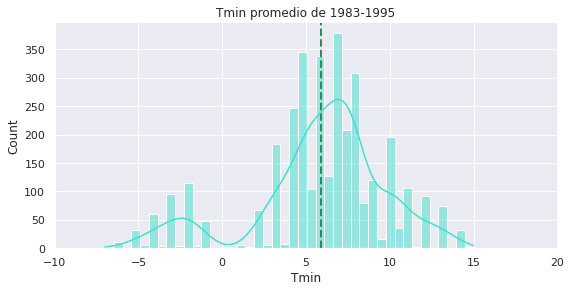

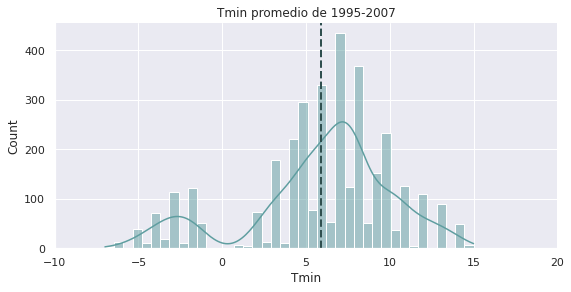

Tmin_promedio 1983-1995 =  5.880242284395783  °C
Tmin_promedio 1995-2007 =  5.9046298942555335  °C
Tmin_sdev  1983-1995 =  3.9746330890873915 ºC
Tmin_sdev  1995-2007  =  4.321183377841936 ºC


In [59]:
g1 = sns.displot(df_p1.Tmin,kde=True,color='turquoise',height=4,aspect=2);
plt.axvline(df_p1.Tmin.mean(),linestyle='--',linewidth=2,color='seagreen');

g2 = sns.displot(df_p2.Tmin,kde=True,color='cadetblue',height=4,aspect=2);
plt.axvline(df_p2.Tmin.mean(),linestyle='--',linewidth=2,color='darkslategray');

g1.set(title='Tmin promedio de 1983-1995');
g2.set(title='Tmin promedio de 1995-2007');

g1.set(xlim=(-10,20))
g2.set(xlim=(-10,20))

plt.show()


print('Tmin_promedio 1983-1995 = ', df_p1.Tmin.mean(), ' °C')
print('Tmin_promedio 1995-2007 = ', df_p2.Tmin.mean(), ' °C')

print('Tmin_sdev  1983-1995 = ', df_p1.Tmin.std(), 'ºC' )
print('Tmin_sdev  1995-2007  = ', df_p2.Tmin.std(), 'ºC' )

##Otros ejercicios


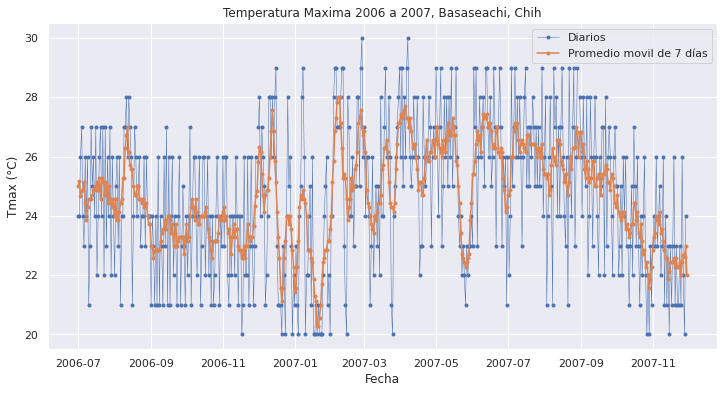

In [60]:
#Fechas de inicio y fin para filtrar informacion
star,end= '2006-01','2007-11'
 
 #Contraste de la grafica de datos diarios y la de promedio movil
 # de 7 dias

sns.set(rc={'figure.figsize':(12,6)})

fig, ax =plt.subplots()

ax.plot(df_00.loc[star:end,'Tmax'],
        marker='.',linestyle='-',linewidth=0.5,label='Diarios')
 
ax.plot(df_00_7d.loc[star:end,'Tmax'],marker='.',linestyle='-',
         label='Promedio movil de 7 días')
 
ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (°C)')
ax.set_title('Temperatura Maxima 2006 a 2007, Basaseachi, Chih')
ax.legend()

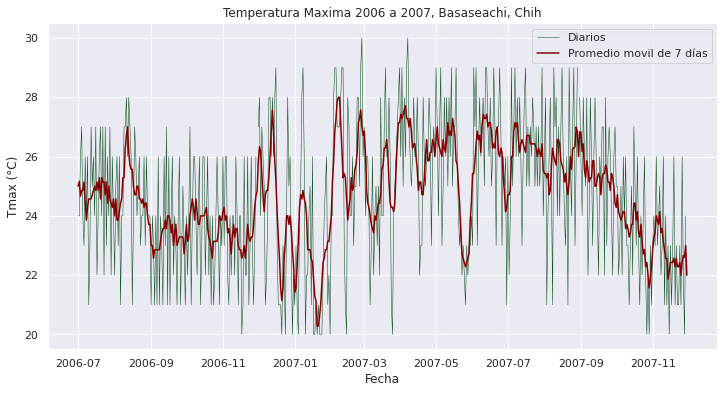

In [61]:
#Mimsa grafica anterior pero sin marcadores 

##promedio movil de 7 dias

sns.set(rc={'figure.figsize':(12,6)})

fig, ax =plt.subplots()

ax.plot(df_00.loc[star:end,'Tmax'],linestyle='-',linewidth=0.5,
        label='Diarios',color='xkcd:pine green')
 
ax.plot(df_00_7d.loc[star:end,'Tmax'],linestyle='-',
         label='Promedio movil de 7 días',color='xkcd:dark red')
 
ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (°C)')
ax.set_title('Temperatura Maxima 2006 a 2007, Basaseachi, Chih')
ax.legend()


La temperatura minima promedio es :  6.4124244578740885


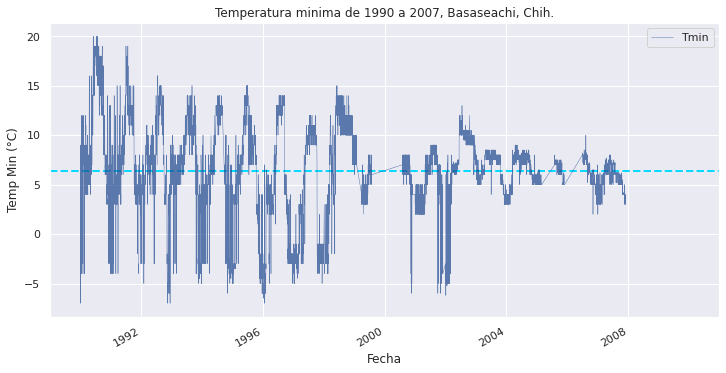

In [62]:
#Hacemos lo anterior con la temperatura 
#Graficamos la temperatura minima de 1983 a 2007 

sns.set(rc={'figure.figsize':(12,6)})

Tmin_ave_00= df_00.Tmin.mean() 

plt.axhline(Tmin_ave_00, color='xkcd:neon blue',linestyle='--',linewidth=2)

df_00['Tmin'].plot(linewidth=0.5,alpha=0.7,color='xkcd:cobalt')
plt.ylabel('Temp Min (°C)')

plt.title('Temperatura minima de 1990 a 2007, Basaseachi, Chih.')

plt.legend()
print('La temperatura minima promedio es : ',Tmin_ave_00)